In [1]:
using CSV

In [2]:
theta2 = CSV.read("experiments/theta2/output_table.csv")
theta4 = CSV.read("experiments/baseline/output_table.csv")
theta8 = CSV.read("experiments/theta8/output_table.csv")

,country_names,actual,kappa1972,nosectoral,nosectoral_kappa1972,trade_barriers,diversification,specialization
1,Australia,0.0010523,0.00104244,0.000980576,0.00098891,0.945859,-0.799382,1.74524
2,Austria,0.000351015,0.000461205,0.000353108,0.000492387,-23.8918,-30.1988,6.30703
3,Belgium and Luxembourg,0.000606329,0.000932106,0.000395112,0.00102668,-34.9506,-67.7568,32.8062
4,Canada,0.000409771,0.000663078,0.000437592,0.000772903,-38.2016,-50.5688,12.3672
5,China,0.00627635,0.00622424,0.00688409,0.00690391,0.837331,-0.31845,1.15578
6,Colombia,0.00107554,0.00120563,0.0013284,0.00146964,-10.79,-11.715,0.925013
7,Denmark,0.000509629,0.000818334,0.000172225,0.00042955,-37.7236,-31.4449,-6.27866
8,Finland,0.000687053,0.000778953,0.000571303,0.000756459,-11.798,-23.7699,11.9719
9,France,0.000301995,0.000331828,0.000196277,0.000194739,-8.99049,0.463513,-9.454
10,Germany,0.000332693,0.000381386,0.000134264,0.000175888,-12.7674,-10.9138,-1.85355


In [3]:
total = [theta2[:trade_barriers] theta4[:trade_barriers] theta8[:trade_barriers]]

25×3 Array{Float64,2}:
  -1.95123     1.73391     0.945859
 -63.31      -39.6878    -23.8918  
 -70.3405    -50.5198    -34.9506  
 -73.8901    -60.1251    -38.2016  
   1.13832     1.49387     0.837331
 -37.7665    -21.2795    -10.79    
 -80.6435    -64.0087    -37.7236  
 -49.5874    -24.8989    -11.798   
 -30.0752    -16.0709     -8.99049 
 -51.7414    -27.7769    -12.7674  
 -29.8323     -6.89072    -2.45065 
 -26.1665    -11.183      -4.46864 
 -72.9078    -60.2465    -45.3825  
 -29.272     -14.7662     -8.72792 
  -5.00258    -0.824138    2.00706 
 -70.6425    -51.9349    -29.9495  
 -71.5149    -46.3474    -21.878   
 -57.6143    -30.5658    -12.0291  
 -20.4061      3.63451     7.54482 
   0.966429    0.623654   -0.186121
 -26.0645     -8.39992    -1.34924 
 -74.4418    -54.4939    -33.9859  
 -53.6234    -34.9073    -18.6167  
 -64.7587    -43.7592    -25.1404  
  -0.435814   -0.456716    0.516998

In [4]:
using Plots
function in_between(data1, data2, data3, tolerance=0.0)
    # miniscule sign deviations do not count
    return (data1 .- data2) .* (data2 .- data3) .> -tolerance
end
function plot_sorted(data, tolerance)
    sorted = sortrows(data, by = x->x[2])
    r1 = length(sorted[:,1])
    r2 = length(sorted[:,1][in_between(sorted[:,1], sorted[:,2], sorted[:,3])])
    plot(sorted, label=["theta=2", "theta=4", "theta=8"], xlabel="Countries", ylabel="Percentage change in volatility", title="$r2/$r1 corrert orders")
end

plot_sorted (generic function with 1 method)

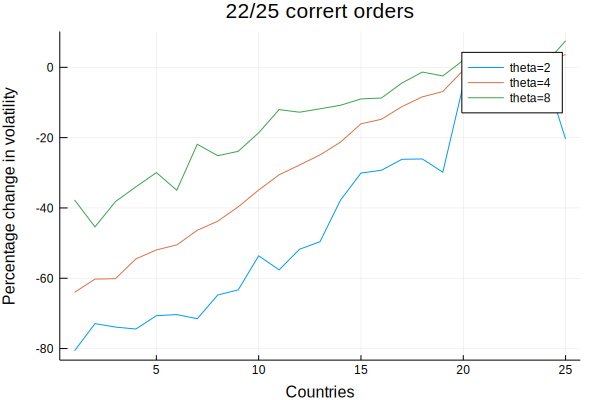

In [7]:
plot_sorted(total, 0.0)